<a href="https://colab.research.google.com/github/jwkanggist/EverybodyTensorflow2.0/blob/master/lab14_lenet5_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LAB14: LeNet5 Implementation

가장 간단한 CNN인 LeNet5를 만들어 보자!

- 표를 보고 직접 코딩해보자! 
- Activation 은 relu를 사용
- Dropout batch_norm도 적용해보자!


In [1]:
# preprocessor parts

from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
import pandas as pd

from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt

from datetime import datetime

TensorFlow 2.x selected.


In [2]:
  # for Tensorboard use
  LOG_DIR = 'drive/data/tb_logs'
	
  !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
  !unzip ngrok-stable-linux-amd64.zip
	
  import os
  if not os.path.exists(LOG_DIR):
    os.makedirs(LOG_DIR)
	  
  get_ipython().system_raw(
      'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
      .format(LOG_DIR))
	
  get_ipython().system_raw('./ngrok http 6006 &')
	
  !curl -s http://localhost:4040/api/tunnels | python3 -c \
      "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2020-01-10 18:54:00--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.3.157.51, 34.236.27.247, 35.168.165.30, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.3.157.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  7.21MB/s    in 1.8s    

2020-01-10 18:54:04 (7.21 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
http://dcaf6131.ngrok.io


In [0]:
# dataset loading part
# 데이터 파이프라인 부분 

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape([x_train.shape[0],
                           x_train.shape[1],
                           x_train.shape[2],1])

x_test = x_test.reshape([x_test.shape[0],
                           x_test.shape[1],
                           x_test.shape[2],1])

In [0]:
# Network Parameters

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),activation='relu'),
  tf.keras.layers.AvgPool2D(pool_size=(2,2),strides=(1,1),padding='valid'),
  tf.keras.layers.Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation='relu'),
  tf.keras.layers.AvgPool2D(pool_size=(2,2),strides=(1,1),padding='valid'),
  tf.keras.layers.Conv2D(filters=120,kernel_size=(5,5),strides=(1,1),activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=84,activation='relu'),
  tf.keras.layers.Dense(units=10,activation='softmax')
])

opt_fn = tf.keras.optimizers.Adam(learning_rate=1e-3,
                                beta_1=0.9,
                                beta_2=0.999)

# 'sparse_categorical_crossentropy' is for integer labels
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tensorboard_callback = TensorBoard(log_dir=LOG_DIR, 
                           histogram_freq=1,
                           write_graph=True,
                           write_images=True)

In [36]:
# model training and evaluation part
training_epochs = 10
batch_size = 128

model.fit(x_train, y_train, 
          epochs=training_epochs,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          callbacks=[tensorboard_callback])
model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1746 - accuracy: 0.9454 - val_loss: 0.0610 - val_accuracy: 0.9801
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0512 - accuracy: 0.9841 - val_loss: 0.0365 - val_accuracy: 0.9883
Epoch 3/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0367 - val_accuracy: 0.9866
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0276 - accuracy: 0.9910 - val_loss: 0.0336 - val_accuracy: 0.9887
Epoch 5/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.0308 - val_accuracy: 0.9905
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0333 - val_accuracy: 0.9904
Epoch 7/10
60000/60000 [==============================] 

[0.04547713424958856, 0.9889]

model prediction = 4


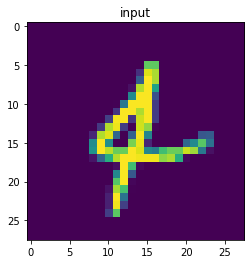

In [37]:
# prediction 

test_input = x_test[300,:,:,:]
pred_y = model.predict(test_input.reshape([1,28,28,1]))

plt.figure(1)
plt.imshow(test_input.reshape([28,28]))
plt.title("input")
print("model prediction = %s"% pred_y.argmax())
